# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">عملیات مروفولوژی</div>

<div style="direction:rtl;text-align:right;font-family:Tahoma">
به طور خلاصه: مجموعه ای از عملیات که تصاویر را بر اساس اشکال پردازش می کند. عملیات مورفولوژیکی یک عنصر ساختاری یا structuring element را به یک تصویر ورودی اعمال می کند و بر اساس آن یک تصویر خروجی تولید می کند.
<br/>
اساسی ترین عملیات مورفولوژیکی عبارتند از: Erosion  و Dilation. آنها طیف وسیعی از کاربردها را دارند، به عنوان مثال:

- حذف نویز
- جداسازی عناصر منفرد ویا اتصال عناصر متفاوت در یک تصویر.
- یافتن برجستگی ها یا intensity bumps در یک تصویر
</div>

<div style="direction:rtl;text-align:right;font-family:Tahoma">
طبق این دو عملیات، opening و closing با فراخوانی این دو پشت هم تعریف میگردد</div>

**Opening:**
$$dst = open( src, element) = dilate( erode( src, element ) )$$
<div style="direction:rtl;text-align:right;font-family:Tahoma">
مفید برای حذف اشیاء کوچک (فرض می شود که اشیاء در یک پیش زمینه تاریک روشن هستند)
</div>

**Closing:**
$$dst = close( src, element ) = erode( dilate( src, element ) )$$

<div style="direction:rtl;text-align:right;font-family:Tahoma">
برای حذف سوراخ های کوچک (مناطق تاریک) مفید است.</div>

## Dilation, Erosion, Opening and Closing 

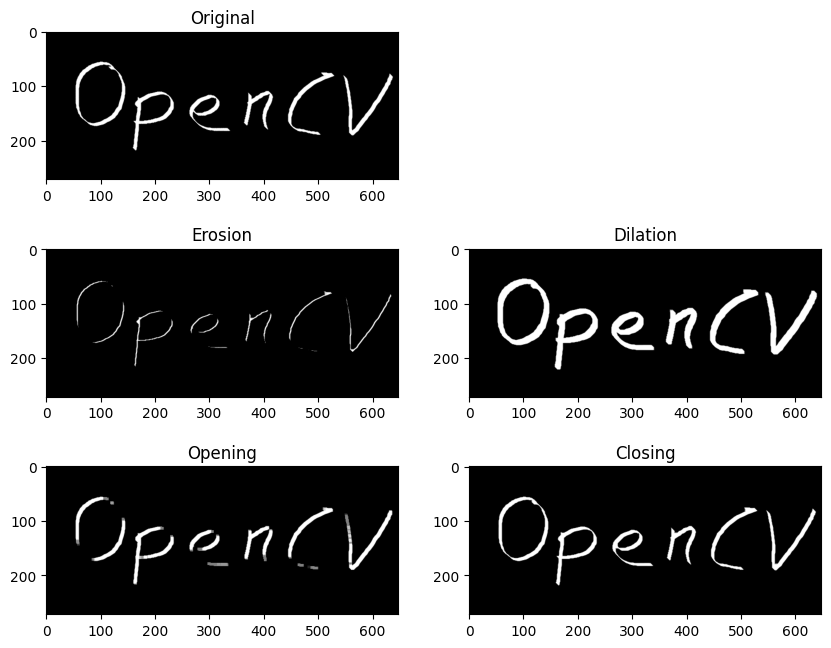

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('images/opencv_inv.png', 0)

# Let's define our kernel size
kernel = np.ones((5,5), np.uint8)

erosion = cv2.erode(image, kernel, iterations = 1)
dilation = cv2.dilate(image, kernel, iterations = 1)
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)



plt.figure(figsize=[10,8])
plt.subplot(321);plt.imshow(image, cmap='gray');plt.title("Original");

plt.subplot(323);plt.imshow(erosion, cmap='gray');plt.title("Erosion");
plt.subplot(324);plt.imshow(dilation, cmap='gray');plt.title("Dilation");

plt.subplot(325);plt.imshow(opening, cmap='gray');plt.title("Opening");
plt.subplot(326);plt.imshow(closing, cmap='gray');plt.title("Closing");


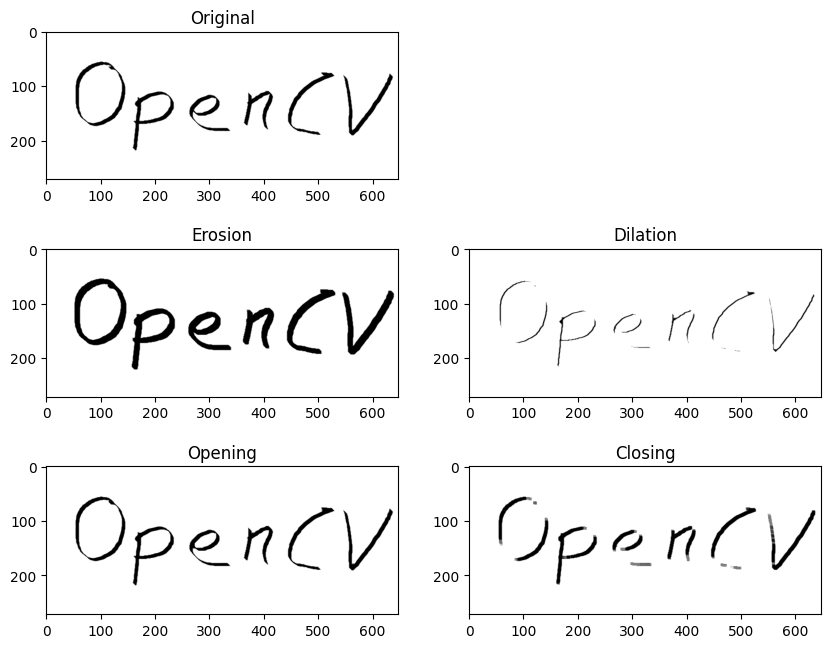

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('images/opencv.png', 0)

# Let's define our kernel size
kernel = np.ones((5,5), np.uint8)

erosion = cv2.erode(image, kernel, iterations = 1)
dilation = cv2.dilate(image, kernel, iterations = 1)
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)



plt.figure(figsize=[10,8])
plt.subplot(321);plt.imshow(image, cmap='gray');plt.title("Original");

plt.subplot(323);plt.imshow(erosion, cmap='gray');plt.title("Erosion");
plt.subplot(324);plt.imshow(dilation, cmap='gray');plt.title("Dilation");

plt.subplot(325);plt.imshow(opening, cmap='gray');plt.title("Opening");
plt.subplot(326);plt.imshow(closing, cmap='gray');plt.title("Closing");


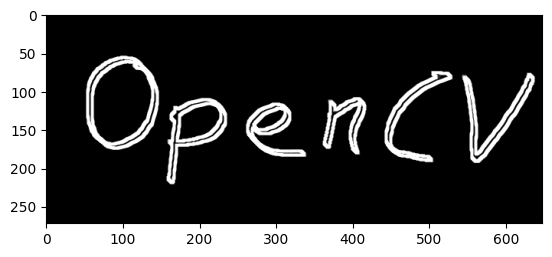

In [2]:
# Morphological Gradient
subtracted = cv2.subtract(dilation, erosion)
plt.imshow(subtracted, cmap='gray')

<div style="direction:rtl;text-align:right;font-family:Tahoma">
استفاده از getStructuringElement</div>

`cv2.getStructuringElement(shape, ksize)`

different shapes can be found by  cv2.MORPH_???

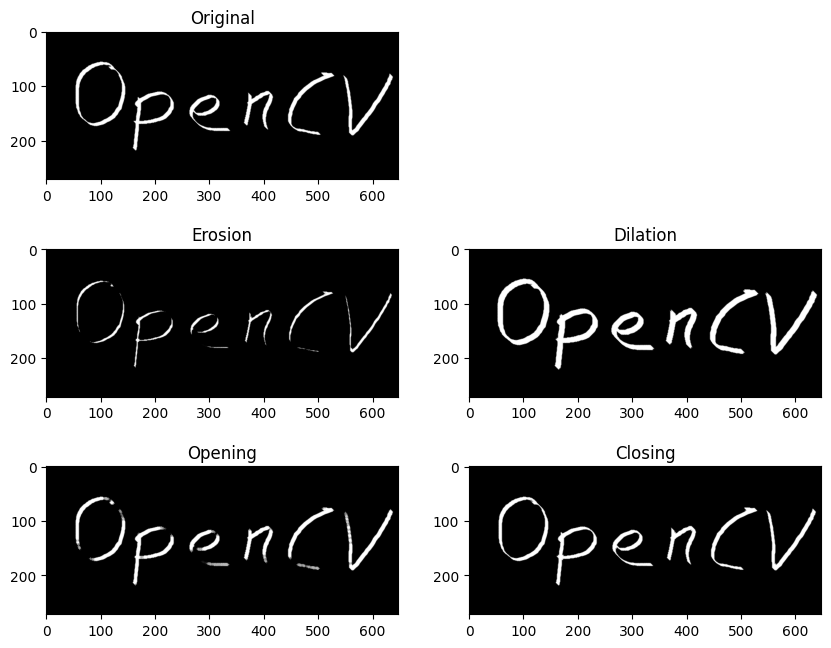

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('images/opencv_inv.png', 0)

# Let's define our kernel size
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5), (2, 2))

erosion = cv2.erode(image, kernel, iterations = 1)
dilation = cv2.dilate(image, kernel, iterations = 1)
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)



plt.figure(figsize=[10,8])
plt.subplot(321);plt.imshow(image, cmap='gray');plt.title("Original");

plt.subplot(323);plt.imshow(erosion, cmap='gray');plt.title("Erosion");
plt.subplot(324);plt.imshow(dilation, cmap='gray');plt.title("Dilation");

plt.subplot(325);plt.imshow(opening, cmap='gray');plt.title("Opening");
plt.subplot(326);plt.imshow(closing, cmap='gray');plt.title("Closing");


<div style="direction:rtl;text-align:right;font-family:Tahoma">
مثال کاربردی Opening</div>

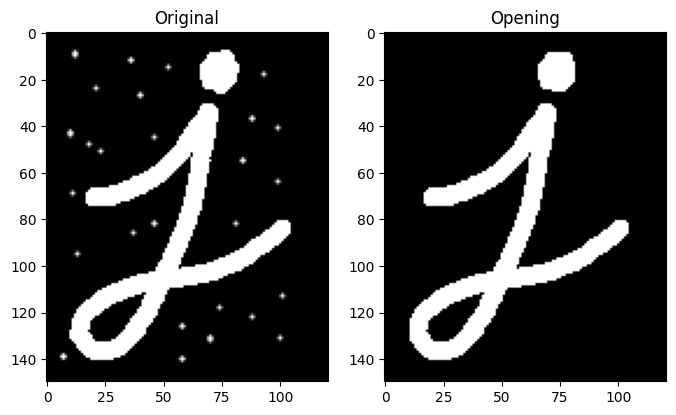

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('images/Opening.png', 0)

# Let's define our kernel size
kernel = np.ones((5,5), np.uint8)

opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)



plt.figure(figsize=[8,5])
plt.subplot(121);plt.imshow(image, cmap='gray');plt.title("Original");
plt.subplot(122);plt.imshow(opening, cmap='gray');plt.title("Opening");


<div style="direction:rtl;text-align:right;font-family:Tahoma">
مثال کاربردی Closing</div>

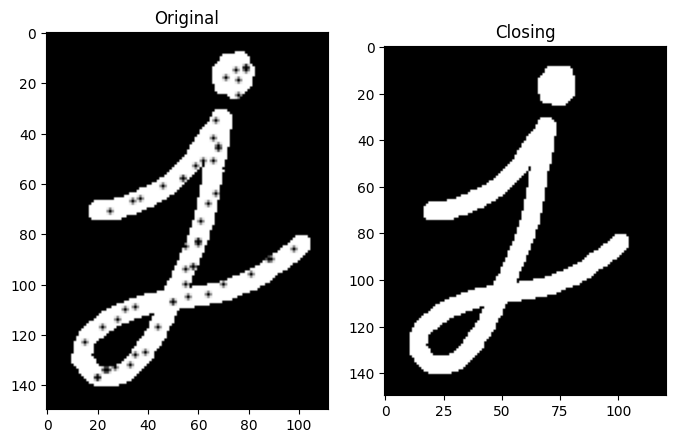

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('images/closing.png', 0)

# Let's define our kernel size
kernel = np.ones((5,5), np.uint8)

closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=[8,5])
plt.subplot(121);plt.imshow(image, cmap='gray');plt.title("Original");
plt.subplot(122);plt.imshow(opening, cmap='gray');plt.title("Closing");


### There are some other less popular morphology operations, see the official OpenCV site:

 - https://docs.opencv.org/4.x/d3/dbe/tutorial_opening_closing_hats.html